# Agile Planner Playbook

In this playbook, we take a tour of the features of [Agile Planner](https://github.com/jasondchambers/agileplanner) 

First, we will walk through the steps to calculate capacity for sample teams for a sample time period.
Then, we will schedule some sample epics for the teams.
Finally, we will create a Gantt chart of the schedule.

In [1]:
from datetime import date
import agileplanner as ap

## Specify Holidays
In this example, there are no holidays - so we just return False when called.

In [2]:
class HolidayScheduleForTesting(ap.HolidaySchedulePort):
    """HolidaySchedulePort implementation for testing."""
    # overriding abstract method
    def falls_on_holiday(self,some_date: date,location: str) -> bool:
        return False

holiday_schedule = HolidayScheduleForTesting()

## Specify the time period

In [3]:
q2 = ap.TimePeriod(
    name='Q2',
    start_date=date(2023,10,25),
    end_date=date(2024,1,23)
)

## Load the sample features

In [4]:
features = ap.Features('features.yaml')
features.load_from_yaml_file()

## Load the sample teams

In [5]:
teams = [
    ap.Team('GSD Team', 'gsd_team.yaml').load_from_yaml_file(),
    ap.Team('Skynet Team', 'skynet_team.yaml').load_from_yaml_file(),
]

## Calculate capacity for individual teams

This is how we generate an individual CSV capacity sheet for the teams for the specified timeperiod. The CSV can be imported in eXcel or your favourite spreadsheet tool. The generated files will be named <team name>_<time period name>.csv and will be written to the current directory.

In [6]:
for team in teams:
    ap.generate_capacity_sheet_for_team(team, q2, holiday_schedule)

## Calculate capacity for the entire org
Now let's generate capacity sheet for the entire org. This time, we will store the returned object - we will use that for scheduling epics later.

In [7]:
org_capacity_q2 = ap.generate_capacity_sheet_for_org("Whole Org", teams, q2, holiday_schedule)   

## Explore the capacity as a Pandas DataFrame
Before we perform some scheduling, we can create a Pandas DataFrame and have some fun with the capacity sheet.

In [8]:
df = org_capacity_q2.get_df()

In [9]:
df

,Team,Person,Location,Start Date,End Date,Front End,Back End,QE,Documentation,DevOps,...,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-20,2024-01-21,2024-01-22,2024-01-23,Total
0,Whole Org,Brian Hofmeister,US,2023-01-01,2030-12-31,F,F,F,F,F,...,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00
1,Whole Org,Mary the Manager,US,2023-01-01,2030-12-31,F,F,F,F,F,...,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00
2,Whole Org,Scooby Doo,US,2023-01-01,2030-12-31,F,T,F,F,F,...,0.25,0.25,0.25,0.25,0.25,0,0,0.25,0.25,16.25
3,Whole Org,Ziggy Stardust,US,2023-01-01,2030-12-31,F,T,F,F,F,...,0.70,0.70,0.70,0.70,0.70,0,0,0.70,0.70,45.50
4,Whole Org,Frankie Boyle,US,2023-01-01,2030-12-31,F,T,F,F,F,...,0.70,0.70,0.70,0.70,0.70,0,0,0.70,0.70,45.50
5,Whole Org,Eastender Ricky,Canada,2023-01-01,2030-12-31,F,T,F,F,F,...,0.65,0.65,0.65,0.65,0.65,0,0,0.65,0.65,42.25
6,Whole Org,Indy Jones,Bangalore,2023-01-01,2030-12-31,F,T,F,F,F,...,0.60,0.60,0.60,0.60,0.60,0,0,0.60,0.60,39.00
7,Whole Org,Terry Berry,Bangalore,2023-01-01,2030-12-31,T,F,F,F,F,...,0.60,0.60,0.60,0.60,0.60,0,0,0.60,0.60,30.60
8,Whole Org,Hunter Pointer,Bangalore,2023-01-01,2030-12-31,T,F,F,F,F,...,0.70,0.70,0.70,0.70,0.70,0,0,0.70,0.70,39.20
9,Whole Org,Iris in a Crisis,Bangalore,2023-01-01,2030-12-31,T,F,F,F,F,...,0.70,0.70,0.70,0.70,0.70,0,0,0.70,0.70,39.20


Let's see how much potential capacity we have for Front End epics

In [10]:
df.loc[df['Front End'] == 'T']['Total'].sum()

109.00000000000006

Let's verify that. First we filter just the people on the team who are skilled in Front End work

In [11]:
front_end_only_df = df.loc[df['Front End'] == 'T']

In [12]:
front_end_only_df

,Team,Person,Location,Start Date,End Date,Front End,Back End,QE,Documentation,DevOps,...,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-20,2024-01-21,2024-01-22,2024-01-23,Total
7,Whole Org,Terry Berry,Bangalore,2023-01-01,2030-12-31,T,F,F,F,F,...,0.6,0.6,0.6,0.6,0.6,0,0,0.6,0.6,30.6
8,Whole Org,Hunter Pointer,Bangalore,2023-01-01,2030-12-31,T,F,F,F,F,...,0.7,0.7,0.7,0.7,0.7,0,0,0.7,0.7,39.2
9,Whole Org,Iris in a Crisis,Bangalore,2023-01-01,2030-12-31,T,F,F,F,F,...,0.7,0.7,0.7,0.7,0.7,0,0,0.7,0.7,39.2


Let's look at the Total column

In [13]:
front_end_only_df[['Person', 'Total']]

,Person,Total
7,Terry Berry,30.6
8,Hunter Pointer,39.2
9,Iris in a Crisis,39.2


Looks about right. How much DevOps capacity do we have?

In [14]:
df.loc[df['DevOps'] == 'T']['Total'].sum()

0.0

A big fat 0. No one on the teams have any DevOps specific skills.

## Create a schedule

Now, let's schedule the epics.

In [15]:
scheduler = ap.TeamScheduler(org_capacity_q2,features.get_epics())
schedule_results = scheduler.build_schedule()

In [16]:
for schedule_result in schedule_results:
    print(schedule_result)

CSESC-1022 171 EpicType.FRONTEND EpicScheduleStatus.NO_CAPACITY_TO_COMPLETE: starts 2023-10-25 and ends WILL NOT COMPLETE IN TIME with 62.00000000000062 remaining
CSESC-1023 50 EpicType.BACKEND EpicScheduleStatus.OK: starts 2023-10-25 and ends 2023-11-17 with 0.0 remaining
CSESC-1024 10 EpicType.BACKEND EpicScheduleStatus.OK: starts 2023-11-17 and ends 2023-11-22 with 0.0 remaining
CSESC-1025 30 EpicType.DEVOPS EpicScheduleStatus.NO_CAPACITY_TO_START: starts WILL NOT START and ends WILL NOT COMPLETE IN TIME with 30 remaining


So, let's dig into the results one by one. CSESC-1022 has a size of 171 points. It is a FrontEnd body of work - and we do have FrontEnd engineers on the team who can take on the work. It is top priority and so starts on the first day of the time period. But, the scheduler says it will not complete in time? Why is that? Recall that we only have a potential FrontEnd capacity of 109. The epic is larger that this and won't fit in the time period. It tells us that there will be 62 points remaining at the end of the time period (171 - 109).

CSESC-1023 is smaller at 50 points. We have the BackEnd skill sets and the capacity to start and finish it. It is scheduled to finish on November 17th. This enables the team to pick up CSESC-1024 and complete it in time because it is only 10 points. CSESC-1025 is a DevOps epic. But recall that we don't have any DevOps skills on the team. Therefore, it is not schedule to start and will obviously not complete in the time period.

Now, let's create a Gantt chart of the schedule - obviously only for the epics that we can start and finish on time. We need to create DataFrame from the ScheduleResults

In [17]:
epic_series = [schedule_result.epic_key for schedule_result in schedule_results if schedule_result.epic_schedule_status == ap.EpicScheduleStatus.OK]
start_dates_series = [date.fromisoformat(schedule_result.start_date) for schedule_result in schedule_results if schedule_result.epic_schedule_status == ap.EpicScheduleStatus.OK]
end_dates_series = [date.fromisoformat(schedule_result.end_date) for schedule_result in schedule_results if schedule_result.epic_schedule_status == ap.EpicScheduleStatus.OK]

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
schedule_df = pd.DataFrame(data={"Epic": epic_series, "Start": start_dates_series, "End": end_dates_series})

In [19]:
schedule_df["Days"] = schedule_df["End"] - schedule_df["Start"]

In [20]:
schedule_df["Color"] = plt.cm.Set1.colors[:len(schedule_df)]

In [21]:
schedule_df

,Epic,Start,End,Days,Color
0,CSESC-1023,2023-10-25,2023-11-17,"23 days, 0:00:00","(0.8941176470588236, 0.10196078431372549, 0.10..."
1,CSESC-1024,2023-11-17,2023-11-22,"5 days, 0:00:00","(0.21568627450980393, 0.49411764705882355, 0.7..."


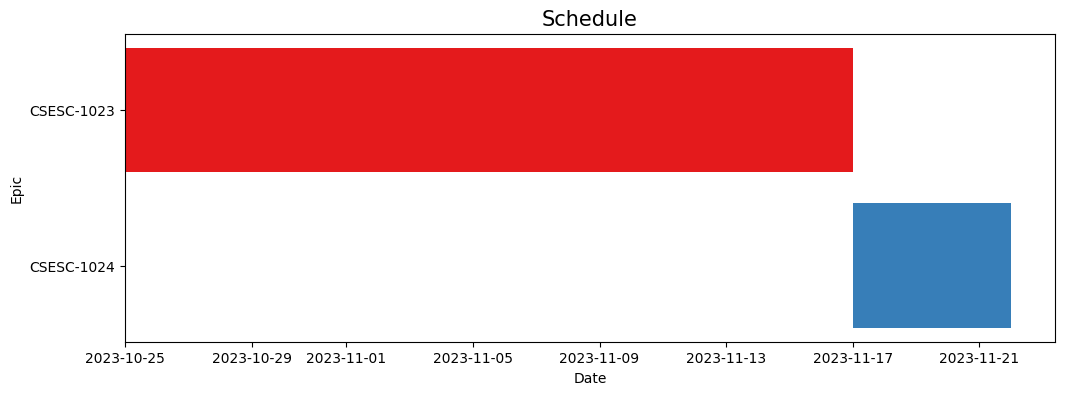

In [22]:
fig = plt.figure(figsize=(12,4))
plt.barh(y=schedule_df['Epic'], width=schedule_df['Days'], left=schedule_df['Start'], color=schedule_df["Color"])
plt.title('Schedule', fontsize=15)
plt.gca().invert_yaxis()
plt.xlabel("Date")
plt.ylabel("Epic")
plt.show()